<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 04 Validating The Prediction Models

### Riccardo Spolaor (864877)

</center>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import python_files.ValidationOperations as valop


In [2]:
dataframe = pd.read_csv('./datasets/dataframe03.csv', low_memory = False)

In [3]:
dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,...,ISNER J.A,ISNER J.B,MOYA C.A,MOYA C.B,DAVYDENKO N.A,DAVYDENKO N.B,GONZALEZ F.A,GONZALEZ F.B,OtherA,OtherB
0,0,0,1.0,46,0,0,1,0,3.0,18.0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,1.0,46,0,0,1,0,3.0,442.0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1.0,46,0,0,1,0,3.0,23.0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1.0,46,0,0,1,0,3.0,69.0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,1.0,46,0,0,1,0,3.0,7.0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Location', 'Tournament', 'Series',
       'Court', 'Round', 'Best of', 'RankA', 'RankFilledA', 'RankB',
       'RankFilledB', 'PtsA', 'PtsFilledA', 'PtsB', 'PtsFilledB', 'MaxA',
       'MaxFilledA', 'MaxB', 'MaxFilledB', 'AvgA', 'AvgFilledA', 'AvgB',
       'AvgFilledB', 'Carpet', 'Clay', 'Grass', 'Hard', 'FEDERER R.A',
       'FEDERER R.B', 'NADAL R.A', 'NADAL R.B', 'DJOKOVIC N.A',
       'DJOKOVIC N.B', 'MURRAY A.A', 'MURRAY A.B', 'RODDICK A.A',
       'RODDICK A.B', 'FERRER D.A', 'FERRER D.B', 'BERDYCH T.A',
       'BERDYCH T.B', 'HEWITT L.A', 'HEWITT L.B', 'DEL POTRO J. M.A',
       'DEL POTRO J. M.B', 'TSONGA J.W.A', 'TSONGA J.W.B', 'CILIC M.A',
       'CILIC M.B', 'WAWRINKA S.A', 'WAWRINKA S.B', 'GASQUET R.A',
       'GASQUET R.B', 'NISHIKORI K.A', 'NISHIKORI K.B', 'MONFILS G.A',
       'MONFILS G.B', 'FERRERO J.C.A', 'FERRERO J.C.B', 'ROBREDO T.A',
       'ROBREDO T.B', 'NALBANDIAN D.A', 'NALBANDIAN D.B', 'RAONIC M.A',
       'RAONIC M.B', 'AGAS

Best Max csvID: 1 - Accuracy: 0.6928549334982987
Wall time: 1min 57s


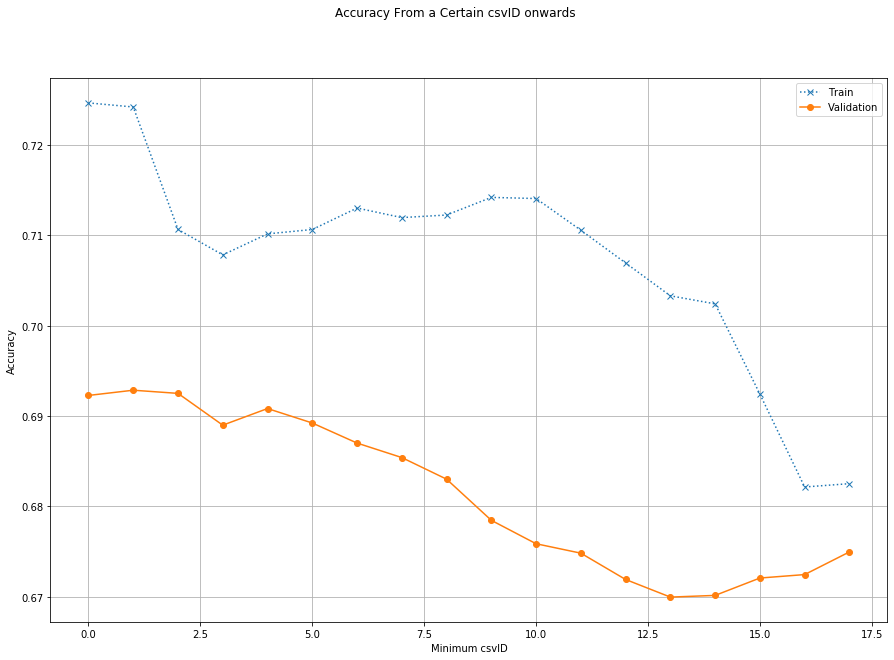

In [5]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

In [6]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,...,ISNER J.A,ISNER J.B,MOYA C.A,MOYA C.B,DAVYDENKO N.A,DAVYDENKO N.B,GONZALEZ F.A,GONZALEZ F.B,OtherA,OtherB
2963,1,1,1.0,46,0,0,1,0,3.0,46.0,...,0,0,0,0,0,0,0,0,1,1
2964,0,1,1.0,46,0,0,1,0,3.0,153.0,...,0,0,0,0,0,0,0,0,1,1
2965,1,1,1.0,46,0,0,1,0,3.0,92.0,...,0,0,0,0,0,0,0,0,1,1
2966,0,1,1.0,46,0,0,1,0,3.0,221.0,...,0,0,0,0,0,0,0,0,1,1
2967,1,1,1.0,46,0,0,1,0,3.0,39.0,...,0,0,0,0,0,0,0,0,1,1


## Decision Tree

Best Max Depth: 5 - Accuracy: 0.6928549334982987
Best Max Features: 33 - Accuracy: 0.6931642437364677
Wall time: 33.2 s


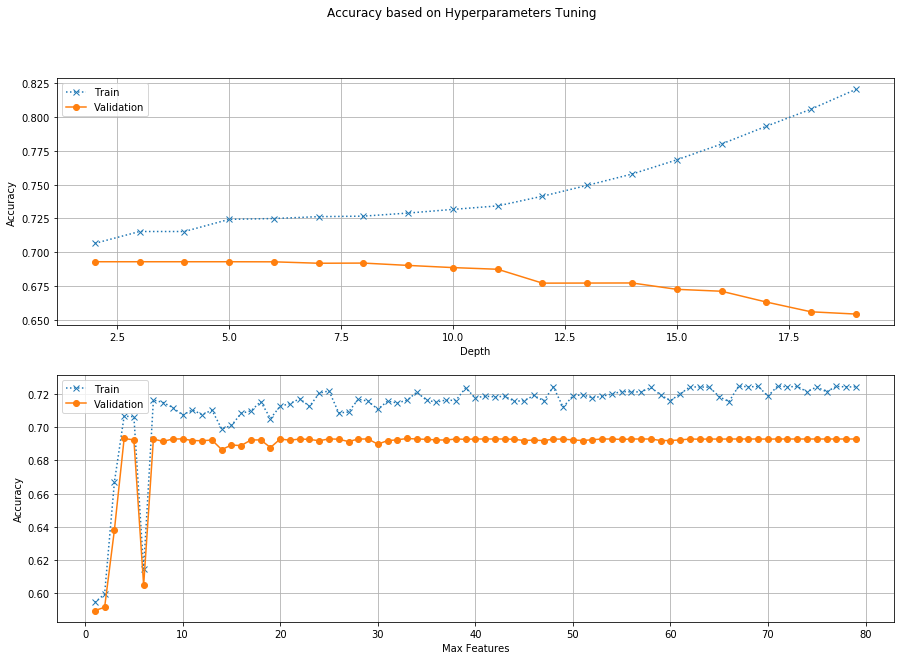

In [7]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

Wall time: 38.9 s


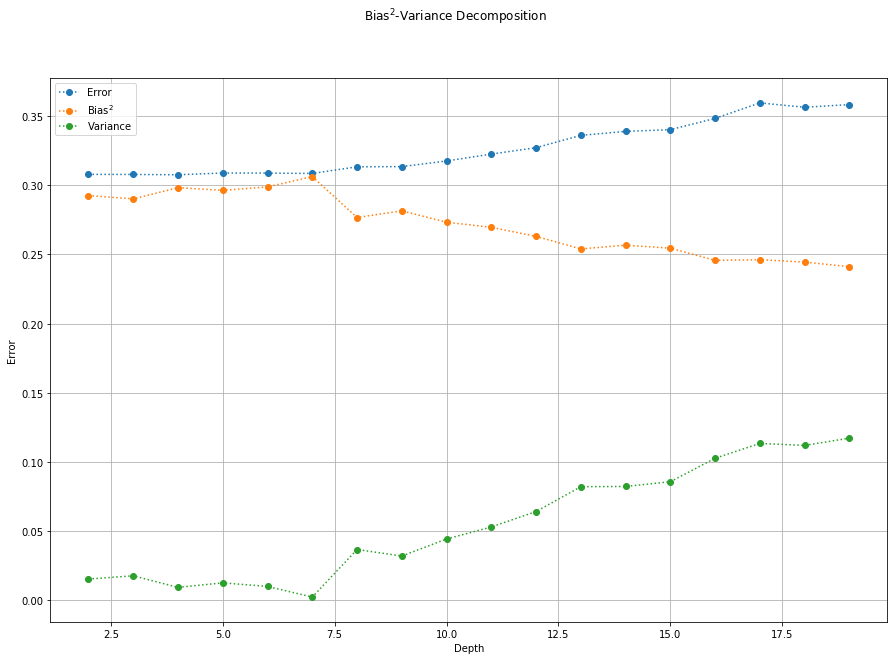

In [8]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.get_tree_variance_bias_decomposition(dataframe)

## Random Forest

Best Estimators Number 275 - Accuracy: 0.6823383854005568
Best Depth 10 - Accuracy: 0.694463346736777
Wall time: 2min 53s


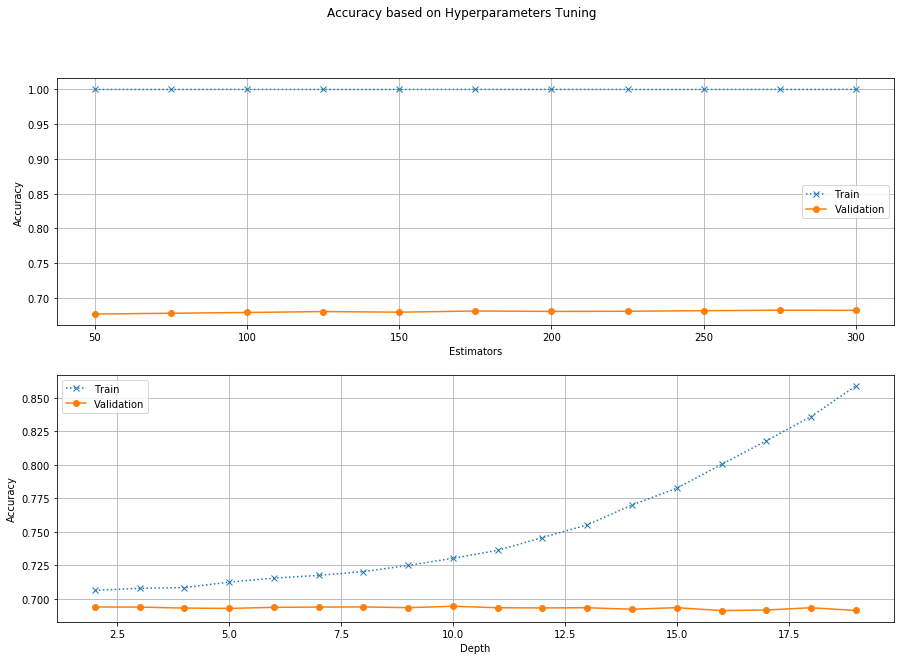

In [9]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)


Wall time: 2min 41s


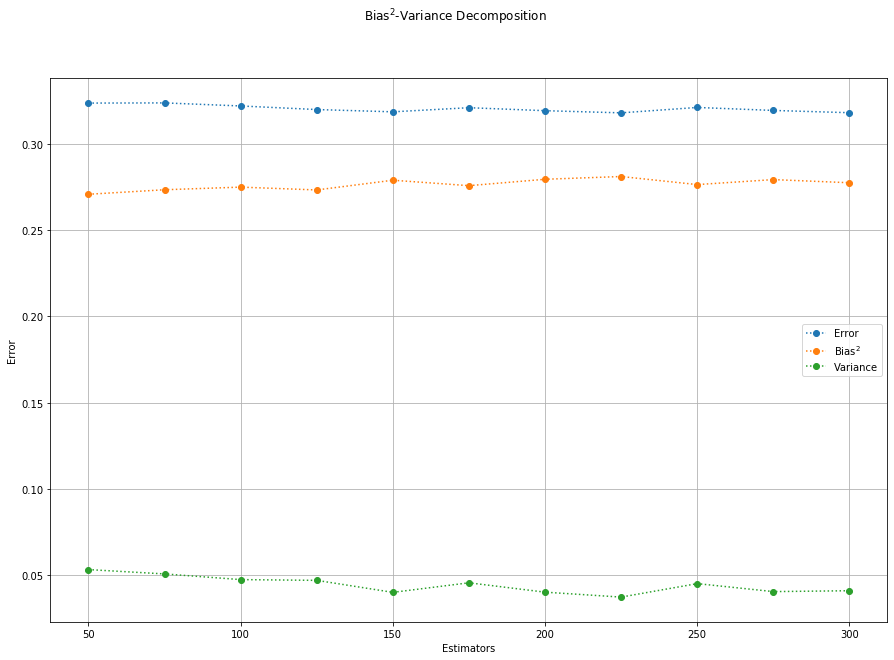

In [10]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe)

Wall time: 3min 42s


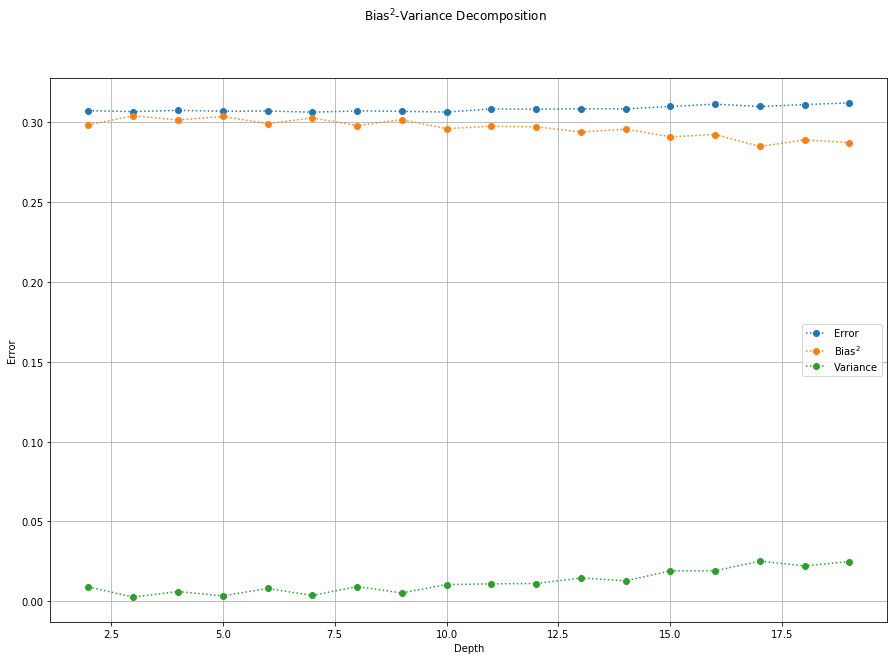

In [11]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe, forest_best_features['n_estimators'])